# Air Pollution prediction with EDA

***Bartlomiej Lesniowski***

***16.12.2024***

## Description

This dataset focuses on air quality assessment across various regions. The dataset contains 5000 samples and captures critical environmental and demographic factors that influence pollution levels.

Features description:
 - Temperature (°C): Average temperature of the region.
 - Humidity (%): Relative humidity recorded in the region.
 - PM2.5 Concentration (µg/m³): Fine particulate matter levels.
 - PM10 Concentration (µg/m³): Coarse particulate matter levels.
 - NO2 Concentration (ppb): Nitrogen dioxide levels.
 - SO2 Concentration (ppb): Sulfur dioxide levels.
 - CO Concentration (ppm): Carbon monoxide levels.
 - Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
 - Population Density (people/km²): Number of people per square kilometer in the region.

Target feature - Air Quality - description:
 - Good: Clean air with low pollution levels.
 - Moderate: Acceptable air quality but with some pollutants present.
 - Poor: Noticeable pollution that may cause health issues for sensitive groups.
 - Hazardous: Highly polluted air posing serious health risks to the population.

## Dataset preparation and cleaning

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
from scipy.stats import skew

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
pollution = pd.read_csv('updated_pollution_dataset.csv')

In [3]:
pollution

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.80,59.10,5.20,17.90,18.90,9.20,1.72,6.30,319,Moderate
1,28.30,75.60,2.30,12.20,30.80,9.70,1.64,6.00,611,Moderate
2,23.10,74.70,26.70,33.80,24.40,12.60,1.63,5.20,619,Moderate
3,27.10,39.10,6.10,6.30,13.50,5.30,1.15,11.10,551,Good
4,26.50,70.70,6.90,16.00,21.90,5.60,1.01,12.70,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.60,74.10,116.00,126.70,45.50,25.70,2.11,2.80,765,Hazardous
4996,28.10,96.90,6.90,25.00,25.30,10.80,1.54,5.70,709,Moderate
4997,25.90,78.20,14.20,22.10,34.80,7.80,1.63,9.60,379,Moderate
4998,25.30,44.40,21.40,29.00,23.70,5.70,0.89,11.60,241,Good


In [4]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
pollution.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

No NaNs, 5000 rows, 10 columns includoing target

## Exploratory Data Analysis

### Defining functions

In [6]:
def plot_var(col):

        f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,3), dpi=90)
    

        sns.boxplot(x=col, y='Air Quality', data=pollution, ax=ax1)
        ax1.set_ylabel('')
        ax1.set_title(col + ' by air quality')
        
        sns.histplot(pollution.loc[pollution[col].notnull(), col], kde=True)

In [7]:
def desc_var(col):

    print('\033[1m' + 'Analysis of ' + col + '\033[0m' + '\n')
    print(pollution[col].describe())
    print()
    print(pollution.groupby('Air Quality')[col].describe())
    print()
    print('\033[1m' + col + ' Skewness: ' + str(skew(pollution[col])) + '\033[0m')
    print()
    plot_var(col)

#### Air Quality

In [8]:
pollution['Air Quality'].describe()

count     5000
unique       4
top       Good
freq      2000
Name: Air Quality, dtype: object

In [9]:
#### Temperature

Temperature (°C): Average temperature of the region.

In [10]:
col = 'Temperature'

Analysis of Temperature

count   5000.00
mean      30.03
std        6.72
min       13.40
25%       25.10
50%       29.00
75%       34.00
max       58.60
Name: Temperature, dtype: float64

              count  mean  std   min   25%   50%   75%   max
Air Quality                                                 
Good        2000.00 24.95 3.30 13.40 22.70 25.00 27.20 35.40
Hazardous    500.00 40.35 6.48 19.50 35.77 40.55 44.73 58.60
Moderate    1500.00 30.14 4.18 17.50 27.40 30.20 32.80 43.70
Poor        1000.00 34.87 5.35 18.90 31.30 34.80 38.60 56.00

Temperature Skewness: 0.7519611348630153



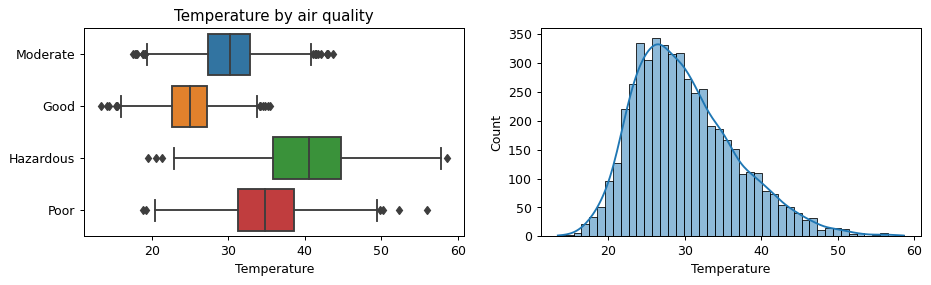

In [11]:
desc_var(col)

It seems that hazardous air quality has highest temperature. It has highest minimum, maximum, mean and temperature range.
This feature has high skewness and visible outliers. I will drop outliers after analysis.

#### Humidity

Humidity (%): Relative humidity recorded in the region.

In [12]:
col = 'Humidity'

Analysis of Humidity

count   5000.00
mean      70.06
std       15.86
min       36.00
25%       58.30
50%       69.80
75%       80.30
max      128.10
Name: Humidity, dtype: float64

              count  mean   std   min   25%   50%    75%    max
Air Quality                                                    
Good        2000.00 60.02 11.63 36.00 50.18 60.10  69.62  84.30
Hazardous    500.00 89.47 14.10 56.90 78.70 89.65 100.50 128.10
Moderate    1500.00 70.21 12.32 38.80 60.10 70.90  80.30  98.00
Poor        1000.00 80.18 12.99 44.60 70.10 80.20  90.00 111.80

Humidity Skewness: 0.280443766176198



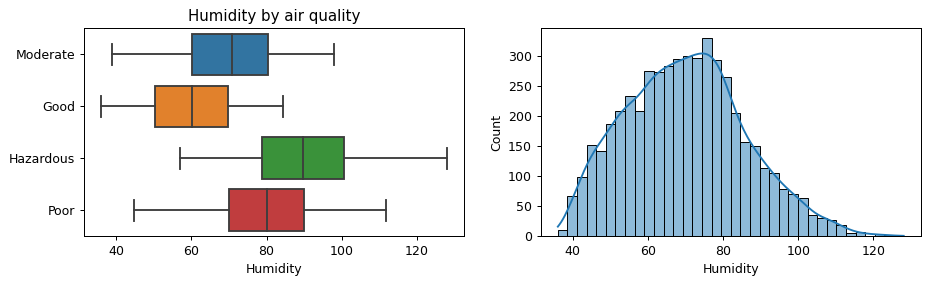

In [13]:
desc_var(col)

There is visible correlation between Humidity percentage and Air Quality. When humidity is rising air quality decreases.

#### PM2.5

Concentration (µg/m³): Fine particulate matter levels.

In [14]:
col = 'PM2.5'

Analysis of PM2.5

count   5000.00
mean      20.14
std       24.55
min        0.00
25%        4.60
50%       12.00
75%       26.10
max      295.00
Name: PM2.5, dtype: float64

              count  mean   std  min   25%   50%   75%    max
Air Quality                                                  
Good        2000.00  9.91  9.71 0.00  2.80  7.00 14.20  92.70
Hazardous    500.00 41.92 41.39 0.20 12.17 30.15 57.77 295.00
Moderate    1500.00 20.46 20.42 0.00  5.90 13.90 28.52 164.90
Poor        1000.00 29.24 28.59 0.10  8.90 19.85 40.50 173.20

PM2.5 Skewness: 2.8900426466218376



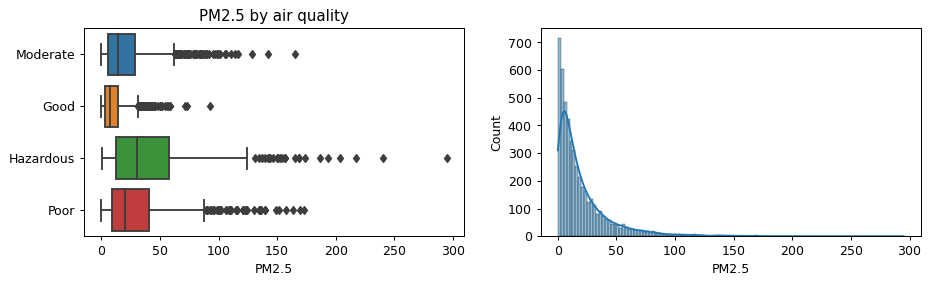

In [15]:
desc_var(col)

Hazardous air quality level shows significantly higher PM2.5 values. With rising quality of air, concentration of PM2.5 decreases.

As this feature is higly skewed I will drop outliers after EDA.

#### PM10

Concentration (µg/m³): Coarse particulate matter levels

In [16]:
col = 'PM10'

Analysis of PM10

count   5000.00
mean      30.22
std       27.35
min       -0.20
25%       12.30
50%       21.70
75%       38.10
max      315.80
Name: PM10, dtype: float64

              count  mean   std   min   25%   50%   75%    max
Air Quality                                                   
Good        2000.00 14.99  9.94 -0.20  8.10 12.10 19.32  98.00
Hazardous    500.00 61.51 41.95  2.20 32.20 50.75 79.33 315.80
Moderate    1500.00 30.60 20.70  1.30 16.00 24.45 39.30 168.70
Poor        1000.00 44.45 29.43  1.90 24.30 36.05 55.80 194.70

PM10 Skewness: 2.5340543015631374



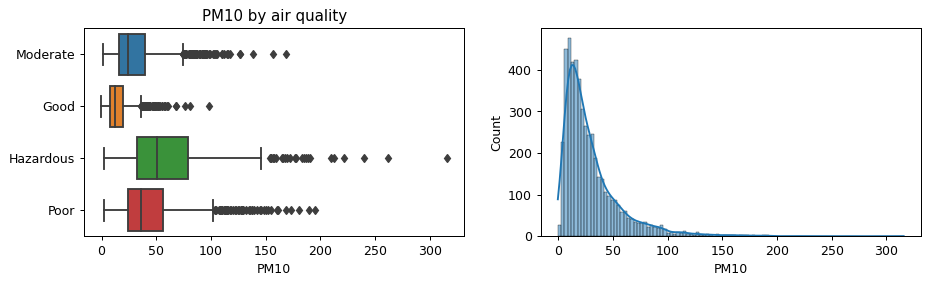

In [17]:
desc_var(col)

Just like the previous feature - with rising PM10 concentration, the quality of air decreases. 

As this feature is higly skewed I will drop outliers after EDA

#### NO2

Concentration (ppb): Nitrogen dioxide levels

In [18]:
col = 'NO2'

Analysis of NO2

count   5000.00
mean      26.41
std        8.90
min        7.40
25%       20.10
50%       25.30
75%       31.90
max       64.90
Name: NO2, dtype: float64

              count  mean  std   min   25%   50%   75%   max
Air Quality                                                 
Good        2000.00 19.45 4.69  7.40 15.40 19.60 23.40 30.80
Hazardous    500.00 40.60 7.74 16.60 35.20 40.35 46.12 64.90
Moderate    1500.00 26.44 5.07 13.80 22.70 26.40 30.10 41.30
Poor        1000.00 33.21 6.27 14.60 28.90 33.15 37.50 50.30

NO2 Skewness: 0.6385910239440106



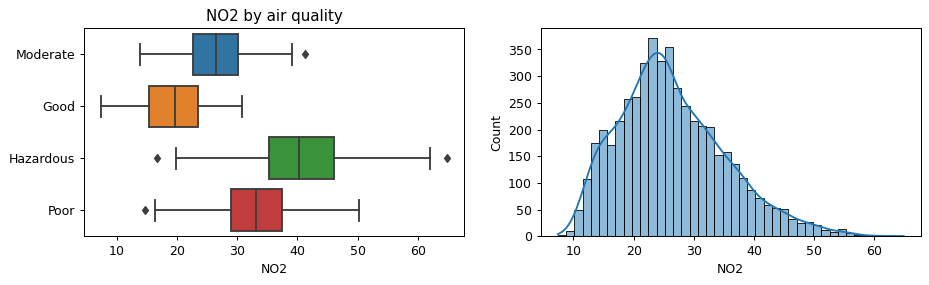

In [19]:
desc_var(col)

NO2 levels are rising, when Air Quality is decreasing

#### SO2

Concentration (ppb): Sulfur dioxide levels

In [20]:
col = 'SO2'

Analysis of SO2

count   5000.00
mean      10.01
std        6.75
min       -6.20
25%        5.10
50%        8.00
75%       13.72
max       44.90
Name: SO2, dtype: float64

              count  mean  std   min   25%   50%   75%   max
Air Quality                                                 
Good        2000.00  5.04 2.06 -1.40  3.70  5.00  6.40 12.70
Hazardous    500.00 20.02 8.00 -0.20 15.20 19.90 25.52 44.90
Moderate    1500.00  9.98 4.02 -2.80  7.30  9.90 12.60 24.50
Poor        1000.00 15.03 6.19 -6.20 11.00 15.15 19.23 33.90

SO2 Skewness: 1.166422202178266



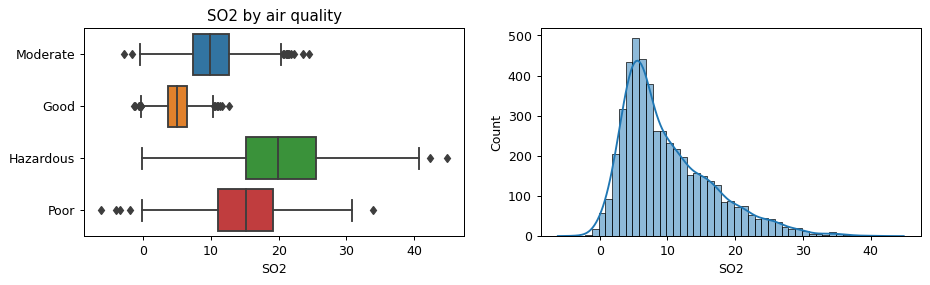

In [21]:
desc_var(col)

Regarding SO2 with decreasing air quality minimum, maximum, mean and range is increasing

#### CO

Concentration (ppm): Carbon monoxide levels

In [22]:
col = 'CO'

Analysis of CO

count   5000.00
mean       1.50
std        0.55
min        0.65
25%        1.03
50%        1.41
75%        1.84
max        3.72
Name: CO, dtype: float64

              count  mean  std  min  25%  50%  75%  max
Air Quality                                            
Good        2000.00  1.00 0.10 0.65 0.93 1.00 1.07 1.37
Hazardous    500.00  2.49 0.40 1.12 2.22 2.46 2.73 3.72
Moderate    1500.00  1.51 0.20 0.92 1.37 1.50 1.64 2.08
Poor        1000.00  2.00 0.30 0.99 1.80 1.99 2.20 3.01

CO Skewness: 0.8788039578922531



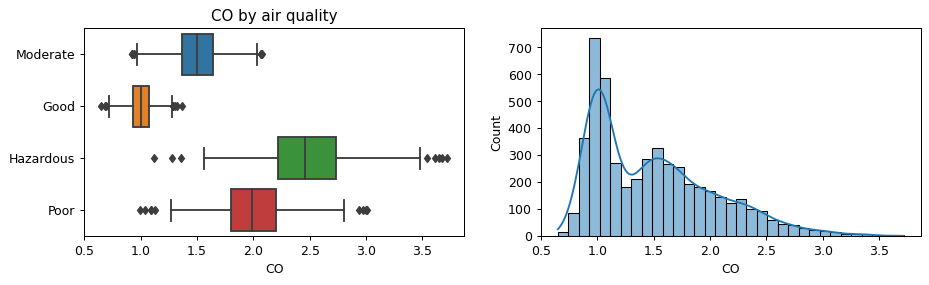

In [23]:
desc_var(col)

Similarly to PM2.5, PM10, NO2, SO2 with increasing concentration of CO air quality decreases

#### Proximity to Industrial Areas (km)

Distance to the nearest industrial zone

In [24]:
col = 'Proximity_to_Industrial_Areas'

Analysis of Proximity_to_Industrial_Areas

count   5000.00
mean       8.43
std        3.61
min        2.50
25%        5.40
50%        7.90
75%       11.10
max       25.80
Name: Proximity_to_Industrial_Areas, dtype: float64

              count  mean  std   min   25%   50%   75%   max
Air Quality                                                 
Good        2000.00 11.99 2.02 10.00 10.60 11.30 12.70 25.80
Hazardous    500.00  4.59 2.17  2.50  3.00  3.95  5.40 20.80
Moderate    1500.00  6.96 1.93  5.00  5.60  6.30  7.70 19.40
Poor        1000.00  5.42 2.02  3.30  4.00  4.80  6.20 21.60

Proximity_to_Industrial_Areas Skewness: 0.4696106258540725



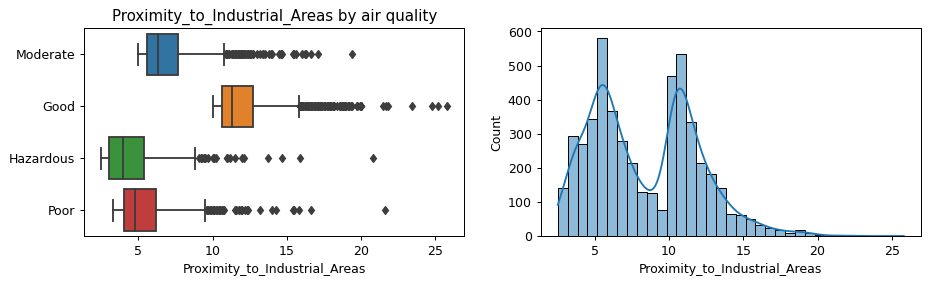

In [25]:
desc_var(col)

Industrial activities contribute significantly to pollution levels. Lower proximity has poorer air quality.

#### Population Density (people/km²)

Number of people per square kilometer in the region

In [26]:
col = 'Population_Density'

Analysis of Population_Density

count   5000.00
mean     497.42
std      152.75
min      188.00
25%      381.00
50%      494.00
75%      600.00
max      957.00
Name: Population_Density, dtype: float64

              count   mean    std    min    25%    50%    75%    max
Air Quality                                                         
Good        2000.00 398.94 115.58 188.00 303.00 391.00 498.25 623.00
Hazardous    500.00 696.01 120.21 425.00 596.25 692.00 789.00 957.00
Moderate    1500.00 497.57 115.83 249.00 399.00 496.50 599.00 739.00
Poor        1000.00 594.88 118.42 339.00 492.00 597.50 689.00 841.00

Population_Density Skewness: 0.20416980710822955



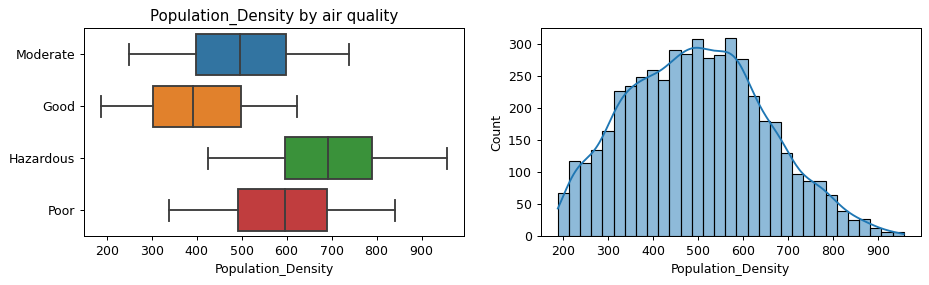

In [27]:
desc_var(col)

Higher density is highly correlated with air quaility. As population density increases, pollution increases

## Dealing with outliers

In [28]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [29]:
pollution['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [30]:
pollution['Air Quality'].value_counts(normalize = True)

Air Quality
Good        0.40
Moderate    0.30
Poor        0.20
Hazardous   0.10
Name: proportion, dtype: float64

#### Target to numbers conversion

In [31]:
for col in pollution.drop(columns='Air Quality').columns:
    print('\033[1m' + col + ' Skewness: ' + str(skew(pollution[col])) + '\033[0m\n')

Temperature Skewness: 0.7519611348630153

Humidity Skewness: 0.280443766176198

PM2.5 Skewness: 2.8900426466218376

PM10 Skewness: 2.5340543015631374

NO2 Skewness: 0.6385910239440106

SO2 Skewness: 1.166422202178266

CO Skewness: 0.8788039578922531

Proximity_to_Industrial_Areas Skewness: 0.4696106258540725

Population_Density Skewness: 0.20416980710822955



In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()
pollution['AirQuality']=le.fit_transform(pollution['Air Quality'])
pollution = pollution.drop(['Air Quality'], axis = 1)

In [34]:
pollution['AirQuality'].unique()

array([2, 0, 1, 3])

In [35]:
for col_name in pollution.drop('AirQuality', axis = 1).columns:
    q1=np.quantile(pollution[col_name],0.25)
    q3=np.quantile(pollution[col_name],0.75)
    iqr=q3-q1
    lb=q1-iqr*1.5
    ub=q3+iqr*1.5
    pollution=pollution[(pollution[col_name]>=lb)&(pollution[col_name]<=ub)]

In [36]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   AirQuality                     4158 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 341.1 KB


4158 rows left, there are no nulls

In [37]:
for col in pollution.drop(columns='AirQuality').columns:
    print('\033[1m' + col + ' Skewness: ' + str(skew(pollution[col])) + '\033[0m\n')

Temperature Skewness: 0.5595945785663432

Humidity Skewness: 0.21438503078266036

PM2.5 Skewness: 1.1706092067591791

PM10 Skewness: 0.9230737221546083

NO2 Skewness: 0.40865632665694096

SO2 Skewness: 0.8030618710062908

CO Skewness: 0.7661942740243965

Proximity_to_Industrial_Areas Skewness: 0.2226062180089354

Population_Density Skewness: 0.14891440690179114



Skewness of all features is now closer to normal distribution

In [38]:
pollution['AirQuality'].value_counts()

AirQuality
0    1980
2    1389
3     700
1      89
Name: count, dtype: int64

It seems that we have very inbalanced classes

## Model training

In [39]:
corr = pollution.corr(method = 'pearson')
corr['AirQuality'].sort_values(ascending=False)

AirQuality                       1.00
CO                               0.84
SO2                              0.67
NO2                              0.66
Temperature                      0.63
Humidity                         0.50
Population_Density               0.50
PM10                             0.49
PM2.5                            0.28
Proximity_to_Industrial_Areas   -0.80
Name: AirQuality, dtype: float64

Creating the heatmap

<Axes: >

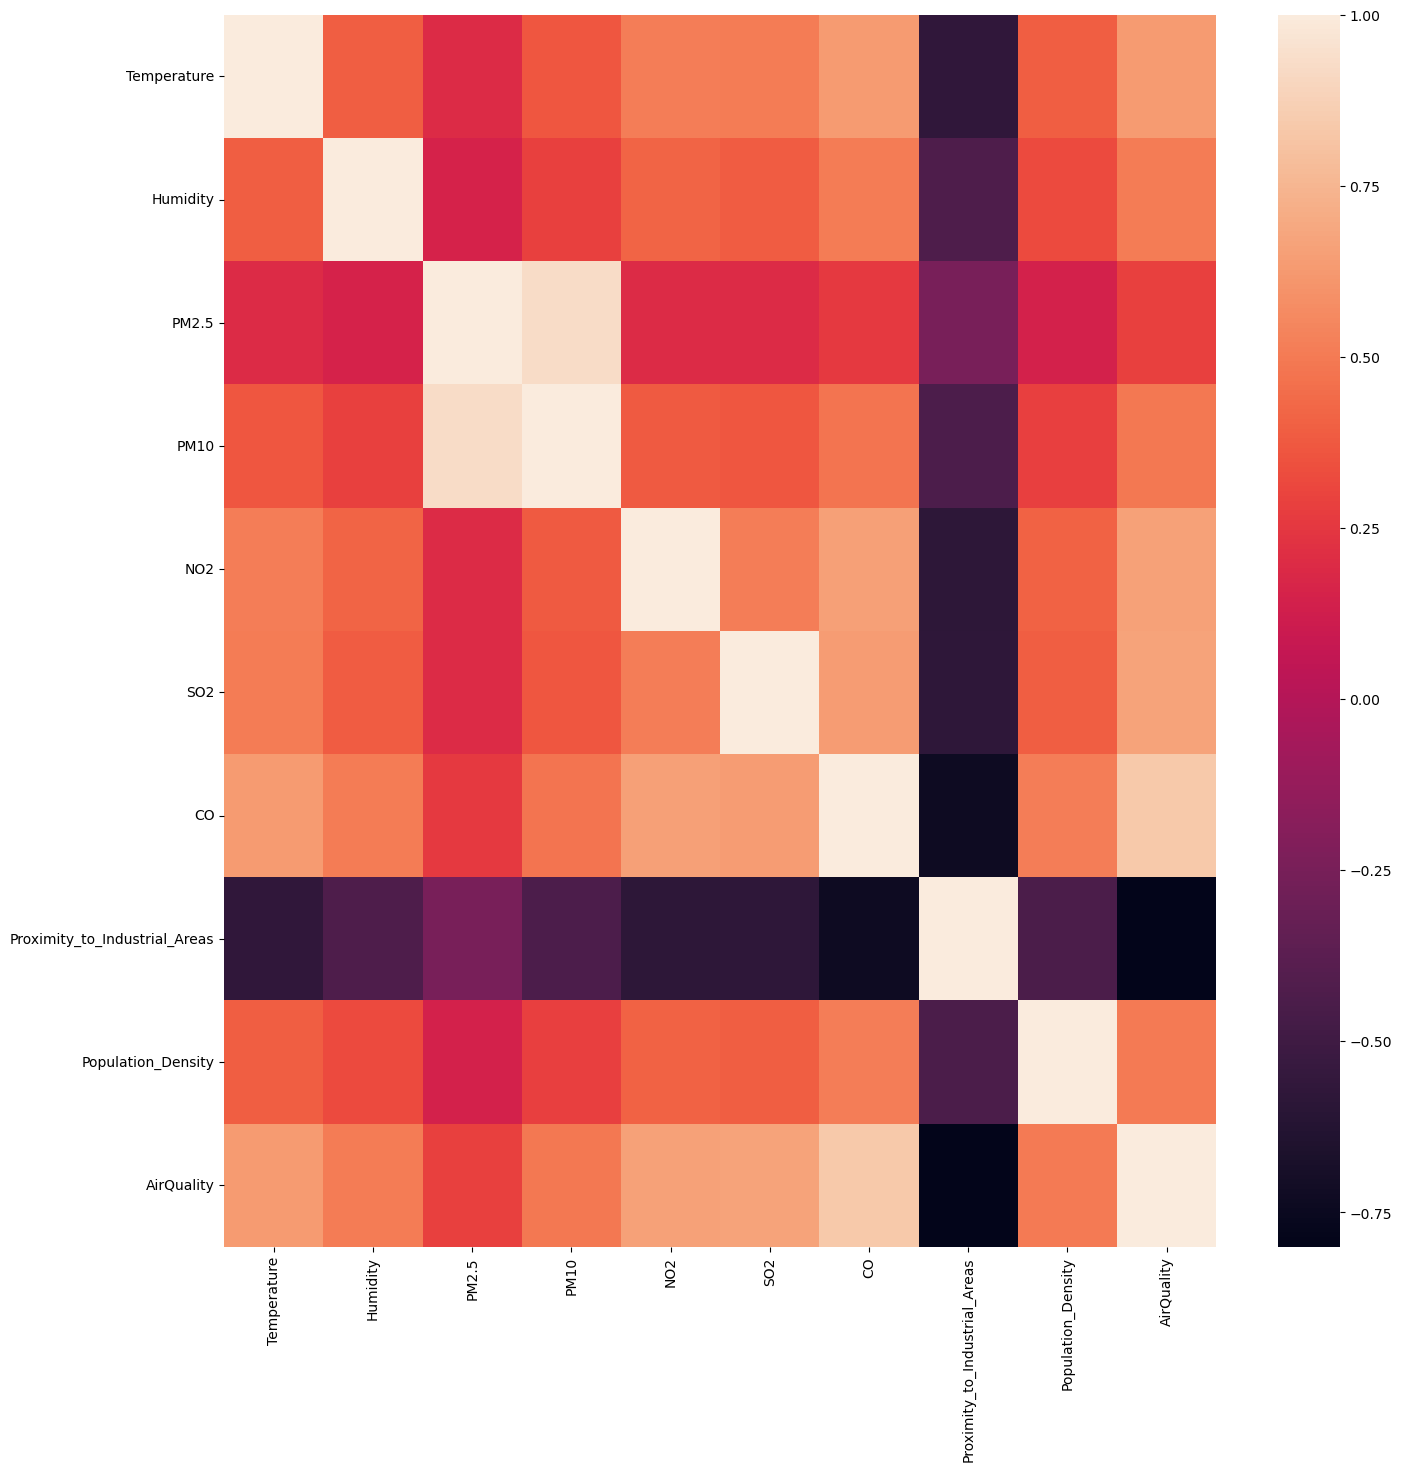

In [40]:
plt.figure(figsize=(16,16))
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

Features are significantly correlated with target feature. I will use t-Student test comparing 'Good' and 'Moderate' air quality to choose features which are statistically significant

In [41]:
from scipy import stats

importance = []
 
for x in pollution[1:]:
    pvalue = stats.ttest_ind(pollution.loc[pollution.AirQuality==0][x], pollution.loc[pollution.AirQuality==2][x])[1]
    if pvalue<0.05:
        importance.append(x)
        print(f'The variable {x} is statistically significant with a pvalue = {pvalue:.2}')
        
print('\n The sum of all statistically significant features including the target feature: ', len(importance))

The variable Temperature is statistically significant with a pvalue = 2.9e-290
The variable Humidity is statistically significant with a pvalue = 9.7e-119
The variable PM2.5 is statistically significant with a pvalue = 2.6e-61
The variable PM10 is statistically significant with a pvalue = 5.3e-165
The variable NO2 is statistically significant with a pvalue = 1.9e-304
The variable SO2 is statistically significant with a pvalue = 0.0
The variable CO is statistically significant with a pvalue = 0.0
The variable Proximity_to_Industrial_Areas is statistically significant with a pvalue = 0.0
The variable Population_Density is statistically significant with a pvalue = 3.2e-119
The variable AirQuality is statistically significant with a pvalue = 0.0

 The sum of all statistically significant features including the target feature:  10


C:\Users\Bartek\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


##### All features are statistically significant

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

In [43]:
X = pollution.drop(['AirQuality'], axis = 1)
y = pollution['AirQuality']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2137)

<h3>I will check couple of models:</h3>
<h5>SVC
<h5>Decision Tree Classifier
<h5>Random Forest Classifier
<h5>KNeighbors
<h5>AdaBoost

In [45]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [46]:
model_list = [SVC(C = 1.0),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100),AdaBoostClassifier(n_estimators=100),KNeighborsClassifier(n_neighbors=100)]

In [47]:
def training_model (model):
    print('\033[1m'+'Scores for the model: ' + str(model)+'\033[0m\n')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('\033[1m'+'Accuracy: '+'\033[0m',accuracy_score(y_test,pred))
    print('Precision: ',precision_score(y_test,pred,average='micro'))
    print('Recall: ',recall_score(y_test,pred,average='micro'))
    print('F1 Score: ',f1_score(y_test,pred,average='micro'))
    print('\nClassification Report: \n',classification_report(y_test,pred))

In [48]:
for model in model_list:
    training_model(model)

Scores for the model: SVC()

Accuracy:  0.7908653846153846
Precision:  0.7908653846153846
Recall:  0.7908653846153846
F1 Score:  0.7908653846153846

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       402
           1       0.00      0.00      0.00        20
           2       0.67      0.80      0.73       265
           3       0.72      0.40      0.51       145

    accuracy                           0.79       832
   macro avg       0.57      0.54      0.54       832
weighted avg       0.77      0.79      0.77       832

Scores for the model: DecisionTreeClassifier()

Accuracy:  0.9326923076923077
Precision:  0.9326923076923077
Recall:  0.9326923076923077
F1 Score:  0.9326923076923077

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       0.52      0.65      0.58        20
           2       0.95      0.91  

C:\Users\Bartek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bartek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bartek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.9615384615384616
Precision:  0.9615384615384616
Recall:  0.9615384615384616
F1 Score:  0.9615384615384616

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      0.65      0.79        20
           2       0.95      0.95      0.95       265
           3       0.88      0.92      0.90       145

    accuracy                           0.96       832
   macro avg       0.96      0.88      0.91       832
weighted avg       0.96      0.96      0.96       832

Scores for the model: AdaBoostClassifier(n_estimators=100)

Accuracy:  0.4182692307692308
Precision:  0.4182692307692308
Recall:  0.4182692307692308
F1 Score:  0.4182692307692308

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.21      0.35       402
           1       0.00      0.00      0.00        20
           2       0.35      0.99      0.52       26

C:\Users\Bartek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bartek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bartek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bartek\anaconda3\Lib\site-packages\sklearn\

# Conclusions

The best accuracy model has Random Forest Classifier: 96,4%. The accuracy is varying due to inbalanced classes.